In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
print(df.shape,'\n')
df.info()

(1048575, 21) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-

## Column Definitions
- USMER : This indicates whether the patient treated medical units of the first, second or third level
- MEDICAL_UNIT : The type of institution of the Natinal Health System that provided the care.
- SEX : 1-"Female", 2-"male".
- PATIENT_TYPE : The type of care the patient received in the unit. 1-"returned home", 2-"hospitalization". 97 and 99 are missing data.
- DATE_DIED : Indicated date of death means that the patient died, except for 9999-99-99 which means that the patient survived..
- INTUBED : Wether the patient was connected to a ventilator. 1-"yes", 2-"no"
- PNEUMONIA : Whether the patient already have air sacs inflamation or not.1-"yes", 2-"no", while 97 and 99 are missing data.
- AGE: The patient's age.
- PREGNANT: Whether the patient is pregnant or not.1-"yes", 2-"no", while 97 and 99 are missing data.
- DIABETES : Whether the patient has diabetes or not.
- COPD : Whether the patient has chronic obstructive pulmonary disease or not.
- ASTHMA : Whether the patient has asthma or not.
- INMSUPR : Whether the patient is immunosuppressed or not.
- HYPERTENSION : Whether the patient has hypertension or not.
- OTHER DISEASE : Whether the patient has other disease or not.
- CARDIOVASCULAR : Whether the patient has patient has heart or blood vessels related diseases.
- OBESITY : Whether the patient is obessed or not.
- RENAL CHRONIC : Whether the patient has chronic renal disease or not.
- TOBACCO : Whether the patient is a tobacco user or not.
- CLASIFFICATION_FINAL : Covid test findings. Values 1-3 means that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- ICU : Whether the patient has been admitted into the intensive care unit.

# Exploratory Data Analysis

## You can get the whole analysis through the below link:
### https://app.powerbi.com/view?r=eyJrIjoiNzgyNWFkOTEtYmQ5NC00NWZmLThmZmQtNzQxZjEzYTYwODM1IiwidCI6IjhkN2UyMGExLTY2YTEtNDE0Yy05YzNjLTZkN2ZlMzA3NzJiYiIsImMiOjh9


In [4]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [5]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [6]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

##### There are no null values, but values 97,98 and 99 are considered as null as per data info.


In [7]:
# Creating table for feature with null value percentage.

perc=[]
for col in list(df.columns):
   perc.append(round(len(df[(df[col]==97) | (df[col]==98) | (df[col]==98)])/len(df)*100,2))

((pd.DataFrame([df.columns,perc]).T).rename(columns={0:"Feature",1:"Percentage"})).sort_values(by="Percentage",ascending=False)

,Feature,Percentage
20,ICU,80.92
5,INTUBED,80.92
8,PREGNANT,50.28
14,OTHER_DISEASE,0.48
12,INMSUPR,0.32
9,DIABETES,0.32
18,TOBACCO,0.31
13,HIPERTENSION,0.3
17,RENAL_CHRONIC,0.29
16,OBESITY,0.29


##### The columns of ICU, INTUBED, PREGNANT have high percentages in null values and don't reflect on the death by high contribution as shown in the exploratory analysis in power bi.

In [8]:
# Drop ICU, INTUBED, PREGNANT Columns

useful_cols=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL']

In [9]:
df=df[useful_cols]
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL'],
      dtype='object')

##### Replace the null values for the other columns

In [10]:
df=df.replace({
    'USMER':{97:np.nan,98:np.nan,99:np.nan},
    'MEDICAL_UNIT':{97:np.nan,98:np.nan,99:np.nan},
    'SEX':{97:np.nan,98:np.nan,99:np.nan}, 
    'PATIENT_TYPE':{97:np.nan,98:np.nan,99:np.nan}, 
    'DATE_DIED':{97:np.nan,98:np.nan,99:np.nan},
    'PNEUMONIA':{97:np.nan,98:np.nan,99:np.nan}, 
    'AGE':{97:np.nan,98:np.nan,99:np.nan}, 
    'DIABETES':{97:np.nan,98:np.nan,99:np.nan}, 
    'COPD':{97:np.nan,98:np.nan,99:np.nan}, 
    'ASTHMA':{97:np.nan,98:np.nan,99:np.nan}, 
    'INMSUPR':{97:np.nan,98:np.nan,99:np.nan},
    'HIPERTENSION':{97:np.nan,98:np.nan,99:np.nan}, 
    'OTHER_DISEASE':{97:np.nan,98:np.nan,99:np.nan}, 
    'CARDIOVASCULAR':{97:np.nan,98:np.nan,99:np.nan}, 
    'OBESITY':{97:np.nan,98:np.nan,99:np.nan},
    'RENAL_CHRONIC':{97:np.nan,98:np.nan,99:np.nan}, 
    'TOBACCO':{97:np.nan,98:np.nan,99:np.nan}, 
    'CLASIFFICATION_FINAL':{97:np.nan,98:np.nan,99:np.nan}
})

In [11]:
df.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
PNEUMONIA               16003
AGE                       345
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
dtype: int64

In [12]:
df=df.dropna()
df.shape

(1024829, 18)

In [13]:
df.DATE_DIED.sort_values()

469095     01/01/2021
444740     01/02/2020
444735     01/02/2020
59262      01/02/2021
19873      01/03/2020
              ...    
374383     9999-99-99
374384     9999-99-99
374385     9999-99-99
374373     9999-99-99
1048574    9999-99-99
Name: DATE_DIED, Length: 1024829, dtype: object

In [14]:
# Replace the date "9999-99-99" as 0 (Not Died)
df.loc[df.DATE_DIED=="9999-99-99","DATE_DIED"]=0

In [15]:
# Replace the other dated as 1 (Died) then rename the column
df.loc[df.DATE_DIED!=0,"DATE_DIED"]=1

df.rename(columns={"DATE_DIED":"DEATH"},inplace=True)

In [16]:
df.DEATH.value_counts()

0    950217
1     74612
Name: DEATH, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024829 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1024829 non-null  int64  
 1   MEDICAL_UNIT          1024829 non-null  int64  
 2   SEX                   1024829 non-null  int64  
 3   PATIENT_TYPE          1024829 non-null  int64  
 4   DEATH                 1024829 non-null  object 
 5   PNEUMONIA             1024829 non-null  float64
 6   AGE                   1024829 non-null  float64
 7   DIABETES              1024829 non-null  float64
 8   COPD                  1024829 non-null  float64
 9   ASTHMA                1024829 non-null  float64
 10  INMSUPR               1024829 non-null  float64
 11  HIPERTENSION          1024829 non-null  float64
 12  OTHER_DISEASE         1024829 non-null  float64
 13  CARDIOVASCULAR        1024829 non-null  float64
 14  OBESITY               1024829 non-

In [18]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
count,1.024829e+06,1.024829e+06,1.024829e+06,1.024829e+06,1.024829e+06,1.024829e+06,1.024829e+06,1.024829e+06,1.024829e+06,1.024829e+06,1.024829e+06,1.024829e+06,1.024829e+06,1.024829e+06,1.024829e+06,1.024829e+06,1.024829e+06
mean,1.642126e+00,8.993825e+00,1.499396e+00,1.187084e+00,1.865842e+00,4.187014e+01,1.880598e+00,1.986030e+00,1.970246e+00,1.986749e+00,1.844415e+00,1.973552e+00,1.980405e+00,1.846861e+00,1.982108e+00,1.919351e+00,5.291146e+00
std,4.793751e-01,3.722449e+00,4.999999e-01,3.899790e-01,3.408222e-01,1.672146e+01,3.242615e-01,1.173669e-01,1.699086e-01,1.143478e-01,3.624616e-01,1.604644e-01,1.386056e-01,3.601213e-01,1.325582e-01,2.722948e-01,1.889566e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000e+00,5.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,1.210000e+02,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00


### Correlation between features

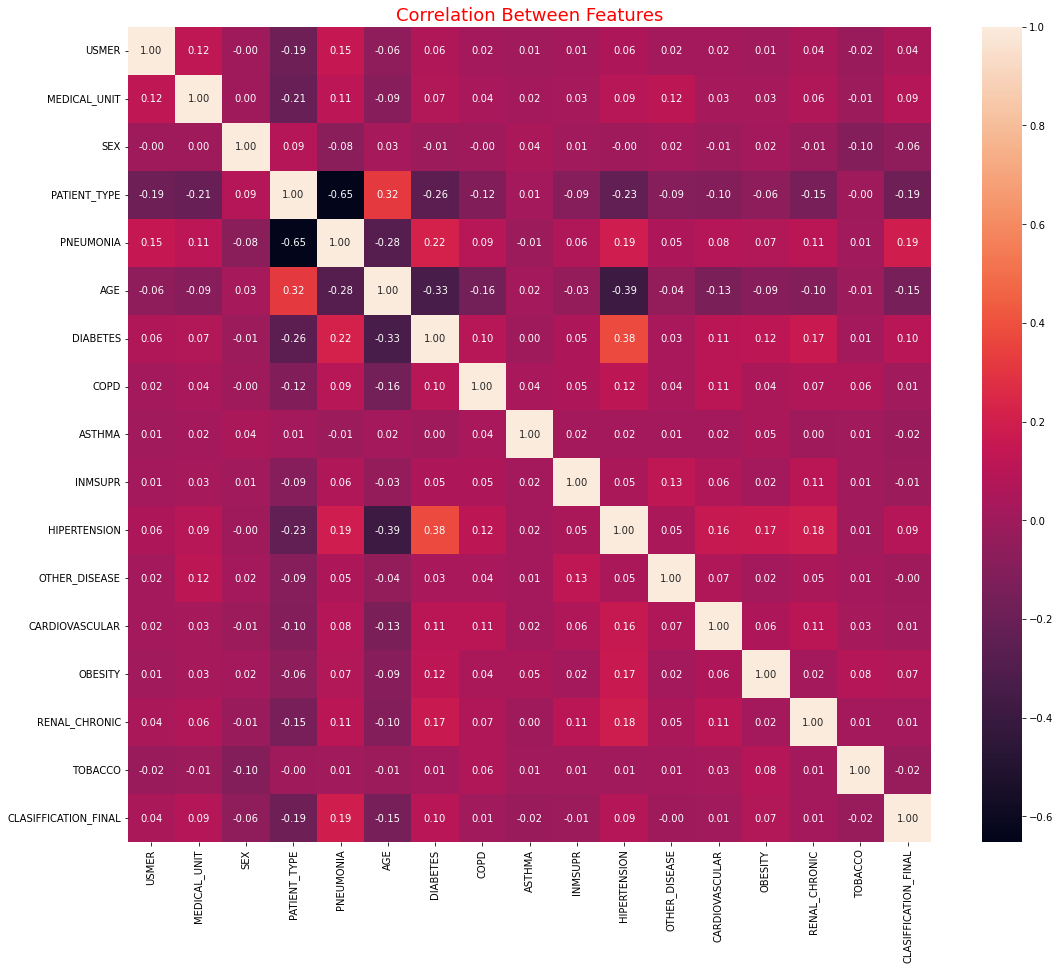

In [19]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");

## Fit the classification models

In [20]:
feature_raw = df.drop('DEATH', axis=1)
outPut= df.DEATH.astype(int)

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train,X_test,y_train,y_test=train_test_split(feature_raw,outPut,test_size=0.3)

### Model-1: Logistic Regression

In [22]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

print("LogisticRegression")
print("*******************************")
print("accuracy score ", accuracy_score(y_test, lr_pred))

### Model-2: Decision Tree

In [24]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [25]:
print("DecisionTree")
print("*******************************")
print("accuracy score ", accuracy_score(y_test, y_pred_dt))

DecisionTree
*******************************
accuracy score  0.9304437483940425


### Model-3: Random Forest Classifier

In [26]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [27]:
print("RandomForest")
print("*******************************")
print("accuracy score ", accuracy_score(y_test, y_pred_rf))

RandomForest
*******************************
accuracy score  0.9337483615168695


### Model-4: Adaboost Classifier

In [28]:
ada= AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada=ada.predict(X_test)

In [29]:
print("AdaBoost")
print("*******************************")
print("accuracy score ", accuracy_score(y_test, y_pred_ada))

AdaBoost
*******************************
accuracy score  0.938526389742689


In [31]:
indices_ada = np.argsort(-ada.feature_importances_)
print("The features in order of importance for Ada Boost are:")
print(50*'-')
for feature in feature_raw.columns[indices_ada]:
    print(feature)

The features in order of importance for Ada Boost are:
--------------------------------------------------
AGE
CLASIFFICATION_FINAL
MEDICAL_UNIT
PATIENT_TYPE
PNEUMONIA
RENAL_CHRONIC
OBESITY
OTHER_DISEASE
INMSUPR
USMER
DIABETES
SEX
TOBACCO
HIPERTENSION
COPD
CARDIOVASCULAR
ASTHMA
